### Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers

### Architecture

In [2]:
model = models.Sequential()

#CONV 1
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

#CONV 2
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(BatchNormalization())

#CONV 3
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())

#CONV 3
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2), padding = 'same'))
model.add(BatchNormalization())
          
#CONV 4
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())          

#FLATTEN
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #Because is a binary clasification

#Summary
model.summary()

#model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-5), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(2, 2))

2023-02-01 13:20:06.525955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 13:20:06.622255: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 13:20:06.623050: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-01 13:20:06.625295: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 74, 74, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

### Preparation of Data

In [3]:
#Generate more images based on the ones that already have for training

train_datagen = ImageDataGenerator(
    rescale = 1./255,         #Scale data and divide in 255 (Max number of pixels)
    rotation_range = 40,      #Rotation of images 40°
    width_shift_range = 0.2,  #Displacement on the horizontal axis
    height_shift_range = 0.2, #displacement on the vertial axis
    shear_range = 0.2,        #Distorsion in axis
    zoom_range = 0.2,         #Zoom of 0.2 in image
    horizontal_flip = True    #Horizontal flip
)

### Test data Rescale

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Load Data from directory
Data from dataset provided

In [5]:
#Train Data
train_generator = train_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/train',
                                  target_size = (150,150), #Define standar size of images
                                  batch_size = 32, #Size of batches
                                  class_mode = 'binary' #because there are only 2 options (Dogs and Cats)
                                  )

#Test Data
validation_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/validation',
                                  target_size = (150,150), #Define standar size of images
                                  batch_size = 32, #Size of batches
                                  class_mode = 'binary' #because there are only 2 options (Dogs and Cats)
                                  )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train Model

In [6]:
#Saving the best model.
checkpoint = ModelCheckpoint('dog_cats_model.hdf5', monitor = 'val_accuracy', verbose = 1, save_best_only = True)

### Compile model

In [7]:
model.compile(loss = 'binary_crossentropy', 
              optimizer = optimizers.Adam(),
              metrics = ['accuracy'])

### Training of model  

In [8]:
hist = model.fit(train_generator,
                steps_per_epoch=2000//32,
                epochs = 10,
                validation_data = validation_generator,
                validation_steps = 1000 // 32,
                callbacks = [checkpoint])

2023-02-01 13:20:10.630833: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-02-01 13:20:12.564429: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


62/62 [==============================] - 33s 408ms/step - loss: 1.3585 - accuracy: 0.5716 - val_loss: 0.8588 - val_accuracy: 0.4990

Epoch 00001: val_accuracy improved from -inf to 0.49899, saving model to dog_cats_model.hdf5
Epoch 2/10
62/62 [==============================] - 20s 321ms/step - loss: 1.0802 - accuracy: 0.5843 - val_loss: 0.7717 - val_accuracy: 0.4990

Epoch 00002: val_accuracy did not improve from 0.49899
Epoch 3/10
62/62 [==============================] - 20s 319ms/step - loss: 0.8309 - accuracy: 0.6179 - val_loss: 0.8625 - val_accuracy: 0.5020

Epoch 00003: val_accuracy improved from 0.49899 to 0.50202, saving model to dog_cats_model.hdf5
Epoch 4/10
62/62 [==============================] - 19s 307ms/step - loss: 0.7061 - accuracy: 0.6494 - val_loss: 1.6159 - val_accuracy: 0.5020

Epoch 00004: val_accuracy did not improve from 0.50202
Epoch 5/10
62/62 [==============================] - 20s 319ms/step - loss: 0.6546 - accuracy: 0.6753 - val_loss: 1.4186 - val_accuracy: 

### Resoults Gaphic Analysis

In [9]:
import matplotlib.pyplot as plt

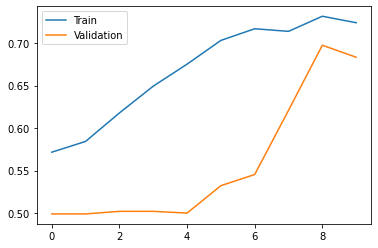

In [10]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

### Model Evaluation

In [11]:
#Test Data
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/test',
                                  target_size = (150,150), #Define standar size of images
                                  batch_size = 32, #Size of batches
                                  class_mode = 'binary' #because there are only 2 options (Dogs and Cats)
                                  )

Found 1000 images belonging to 2 classes.


In [12]:
model2 = model

In [13]:
model2.load_weights('./dog_cats_model.hdf5')

In [14]:
model2.evaluate(test_generator)

32/32 [==============================] - 5s 168ms/step - loss: 0.6485 - accuracy: 0.6650


[0.6485289335250854, 0.6650000214576721]